In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#csv 형식의 training 데이터를 로드합니다.
train = pd.read_csv('./train.csv')

#데이터 살펴보기 위해 데이터 최상단의 5줄을 표시합니다.
train.head() 

,id,text,target
0,0,"\nThey were, and even if Washington might cons...",10
1,1,"We run ""SpaceNews & Views"" on our STAREACH BBS...",14
2,2,\n\n\nNot to worry. The Masons have been demo...,19
3,3,"Only Brendan McKay, or maybe ARF, would come t...",17
4,4,Help: I am running some sample problems from O...,5


In [3]:
temp = train.target.unique() # 라벨의 고유값 확인
np.sort(temp)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

In [4]:
# 결측치 존재 여부를 확인해주는 함수
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9233 entries, 0 to 9232
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9233 non-null   int64 
 1   text    9233 non-null   object
 2   target  9233 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 216.5+ KB


In [6]:
train.text

0       \nThey were, and even if Washington might cons...
1       We run "SpaceNews & Views" on our STAREACH BBS...
2       \n\n\nNot to worry.  The Masons have been demo...
3       Only Brendan McKay, or maybe ARF, would come t...
4       Help: I am running some sample problems from O...
                              ...                        
9228    \n\nPrecisely, why not Cuba??  Why not???  The...
9229    Your Custom Resume On Disk!\n \n              ...
9230    Throughout the years of the Israel/Arab-Palest...
9231    Does anyone know if there are any devices avai...
9232    \n\n      Give ME a break, chum.  Are you tell...
Name: text, Length: 9233, dtype: object

In [7]:
import re 

def clean_text(texts): 
  corpus = [] 
  for i in range(0, len(texts)): 

    review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
    review = re.sub(r'\d+','', review)#숫자 제거
    review = review.lower() #소문자 변환
    review = re.sub(r'\s+', ' ', review) #extra space 제거
    review = re.sub(r'<[^>]+>','',review) #Html tags 제거
    review = re.sub(r'\s+', ' ', review) #spaces 제거
    review = re.sub(r"^\s+", '', review) #space from start 제거
    review = re.sub(r'\s+$', '', review) #space from the end 제거
    review = re.sub(r'_', ' ', review) #space from the end 제거
    corpus.append(review) 
  
  return corpus

temp = clean_text(train['text']) #메소드 적용
train['text'] = temp
train.head()

,id,text,target
0,0,they were and even if washington might conside...,10
1,1,we run spacenews views on our stareach bbs a l...,14
2,2,not to worry the masons have been demonized an...,19
3,3,only brendan mckay or maybe arf would come to ...,17
4,4,help i am running some sample problems from or...,5


In [8]:
val_count = train['target'].value_counts() # 유니크값의 개수를 확인합니다.

for i in range(0,20):
  print(f'라벨 {i}인 리뷰 개수:', val_count[i])

라벨 0인 리뷰 개수: 386
라벨 1인 리뷰 개수: 480
라벨 2인 리뷰 개수: 458
라벨 3인 리뷰 개수: 467
라벨 4인 리뷰 개수: 490
라벨 5인 리뷰 개수: 496
라벨 6인 리뷰 개수: 494
라벨 7인 리뷰 개수: 493
라벨 8인 리뷰 개수: 475
라벨 9인 리뷰 개수: 490
라벨 10인 리뷰 개수: 482
라벨 11인 리뷰 개수: 488
라벨 12인 리뷰 개수: 483
라벨 13인 리뷰 개수: 490
라벨 14인 리뷰 개수: 467
라벨 15인 리뷰 개수: 515
라벨 16인 리뷰 개수: 428
라벨 17인 리뷰 개수: 455
라벨 18인 리뷰 개수: 387
라벨 19인 리뷰 개수: 309


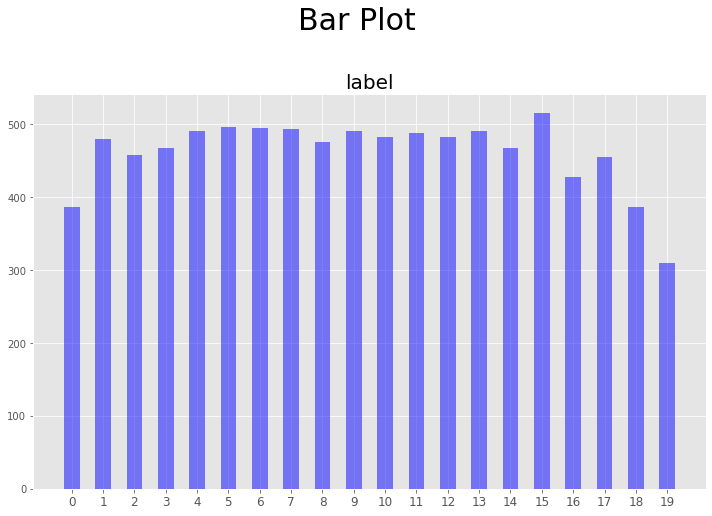

In [9]:
%matplotlib inline
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = train['target']

plt.figure(figsize=(10,7.5)) # 그래프 이미지 크기 설정
plt.suptitle("Bar Plot", fontsize=30) # 부제목과 폰트 크기 설정

plt.title('label', fontsize=20) # 제목과 폰트 크기 설정
temp = feature.value_counts() # feature 변수의 변수별 개수 계산
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5) # 막대그래프 생성
plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

In [10]:
str_len_mean = np.mean(train['text'].str.len()) # 리뷰 길이의 평균값 계산
print('뉴스의 평균 길이 :',round(str_len_mean,0))

뉴스의 평균 길이 : 1020.0


In [11]:
# 데이터 필터링을 위한 마스크 설정
for i in range(0, 20):
  globals()['mask_{}'.format(i)] = (train.target == i)

# 전체 및 그룹 집합을 설정합니다.
df_train = train.text.copy() # 전체 train 데이터

for i in range(0, 20):
  globals()['df_{}'.format(i)] = train.loc[globals()['mask_{}'.format(i)],:].text # 20가지 라벨 각각에 해당하는 데이터를 df0~19로 할당

# 스무가지로 나뉜 집합을 리스트로 묶어줍니다.
compare = [df_0, df_1, df_2, df_3, df_4, df_5, 
           df_6, df_7, df_8, df_9, df_10, df_11,
           df_12, df_13, df_14, df_15, df_16, df_17,
           df_18, df_19]

df_0

52      deleted stuff from andrew wrt which atheist my...
56      deletia in case anybody hadnt noticed frank an...
95      due to a discussion on this group some time ag...
113     no bobby stalin killed millions in the name of...
139     issued by khomeini it shouldnt be relevant to ...
                              ...                        
9116    wait a minute i thought you said that allah i ...
9138    i recall a discussion i had heard years ago it...
9149    i wonder how many atheists out there care to s...
9171    are you saying that their was a physical adam ...
9226    id like this too maybe you should post an answ...
Name: text, Length: 386, dtype: object

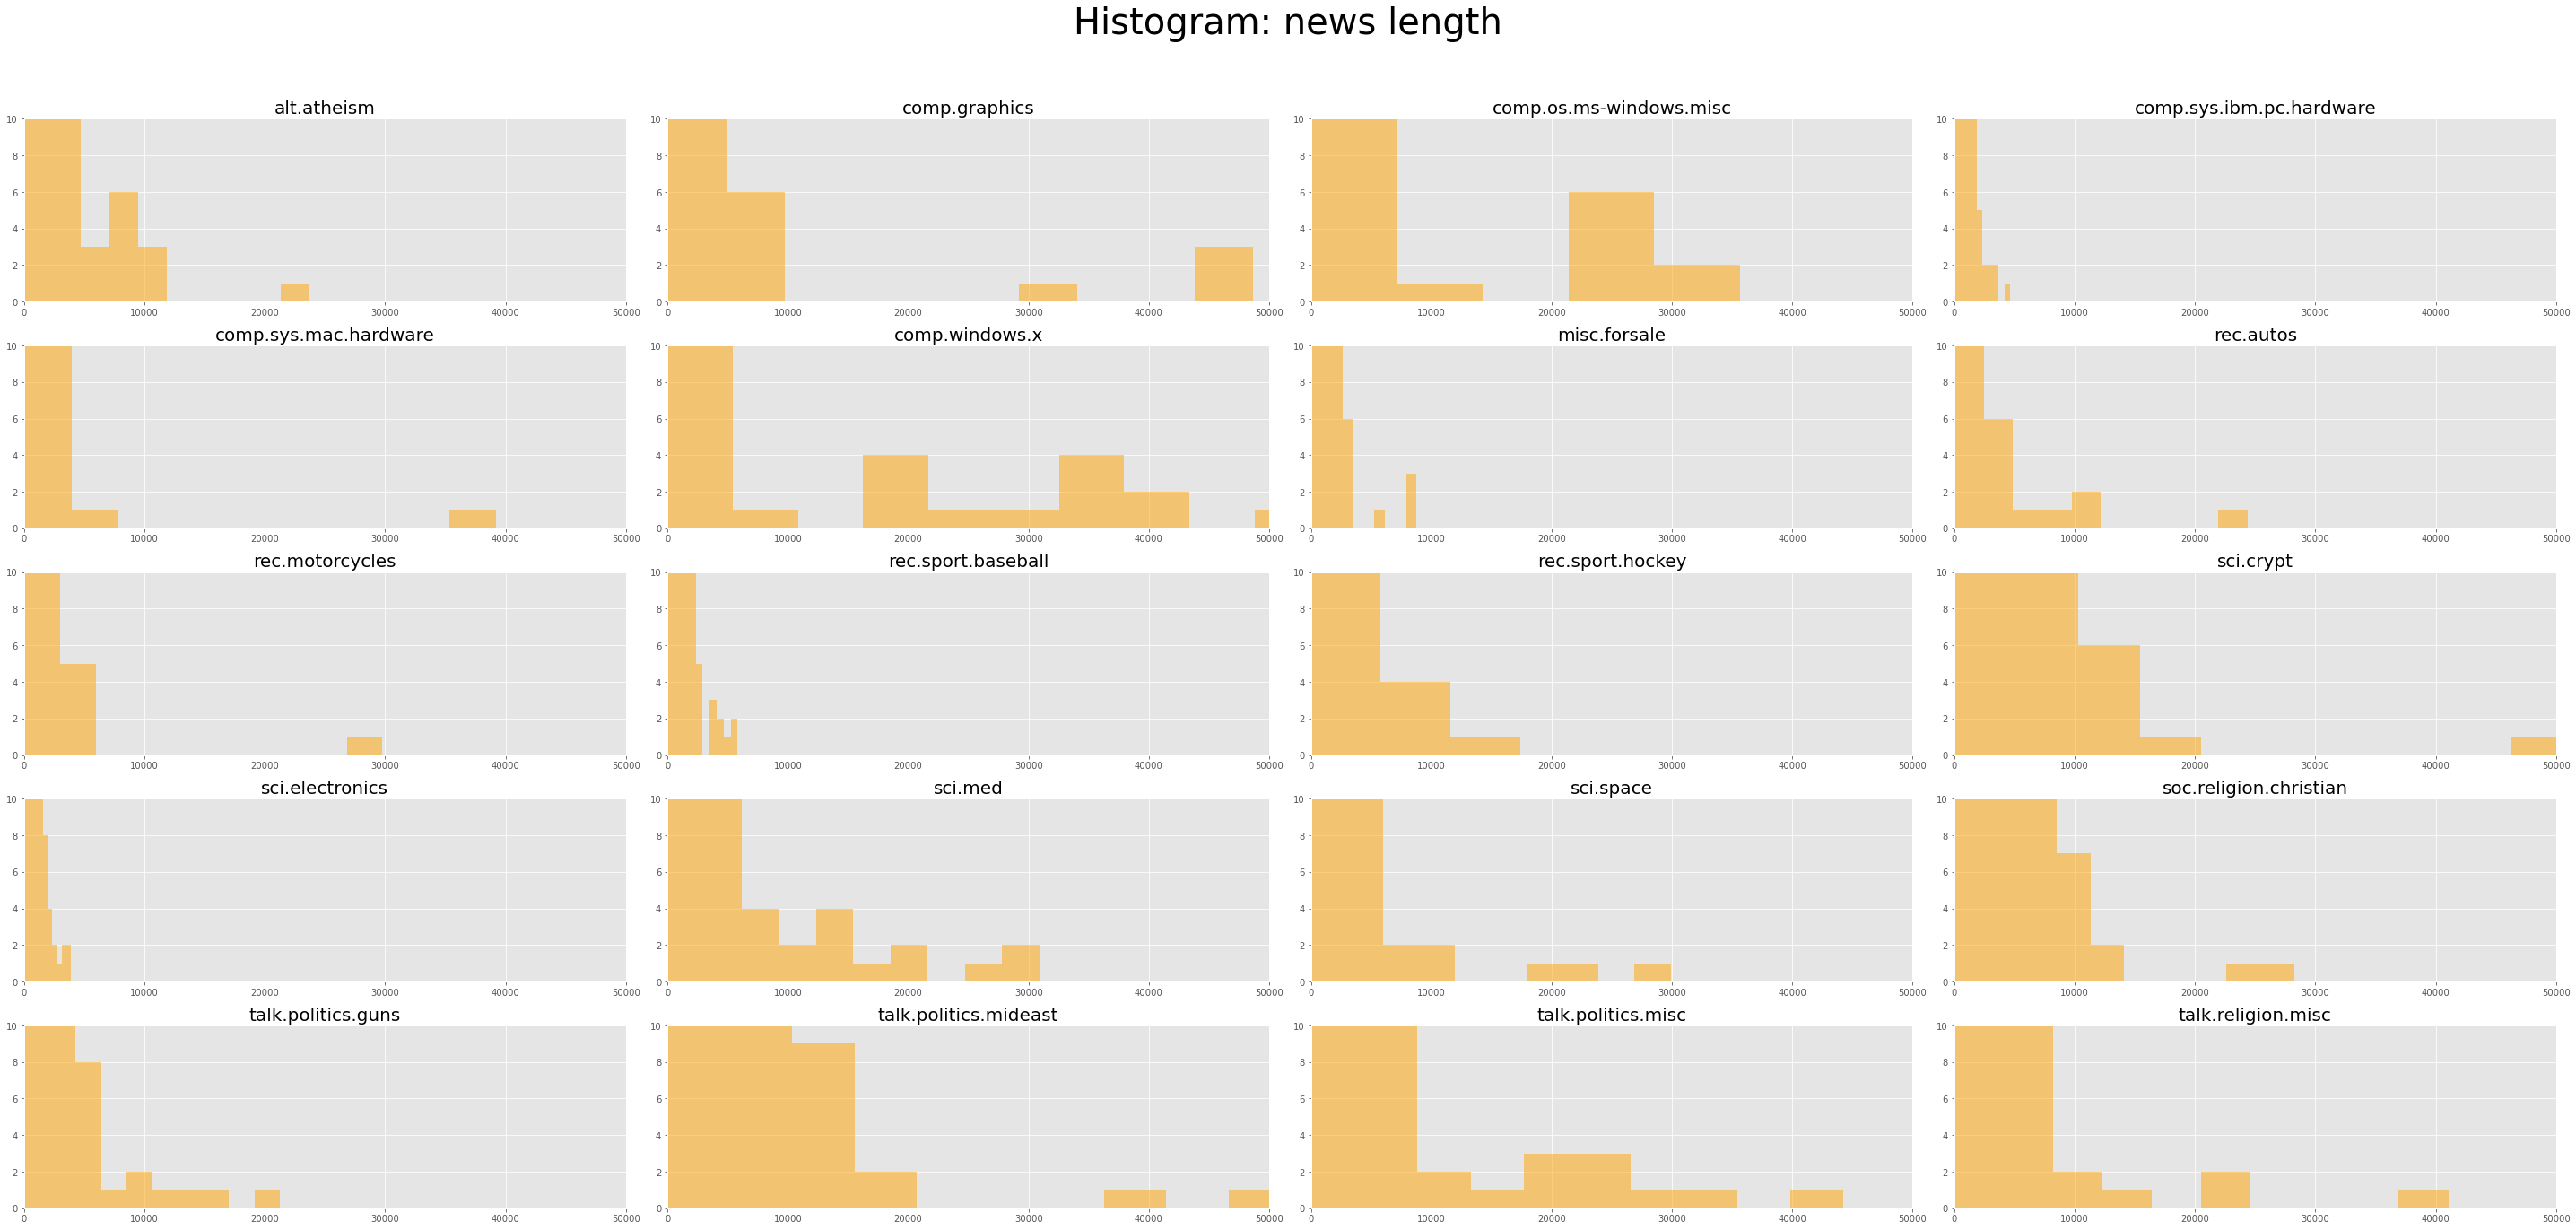

In [12]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(40,20))
plt.suptitle("Histogram: news length", fontsize=40)
name = ['alt.atheism',
        'comp.graphics',
        'comp.os.ms-windows.misc',
        'comp.sys.ibm.pc.hardware',
        'comp.sys.mac.hardware',
        'comp.windows.x',
        'misc.forsale',
        'rec.autos',
        'rec.motorcycles',
        'rec.sport.baseball',
        'rec.sport.hockey',
        'sci.crypt',
        'sci.electronics',
        'sci.med',
        'sci.space',
        'soc.religion.christian',
        'talk.politics.guns',
        'talk.politics.mideast',
        'talk.politics.misc',
        'talk.religion.misc'] # 제목으로 사용할 문자열 (라벨의 실제 이름)

for i in range(len(compare)):
    text = compare[i]
    string_len = [len(x) for x in text]    
    plt.subplot(5,4,i+1) # 행 개수/ 열 개수/ 해당 그래프 표시 순서
    plt.title(name[i], fontsize=20)
    plt.axis([0, 50000, 0, 10])  #x축 시작, 끝 / y축 시작, 끝
    plt.hist(string_len, alpha=0.5, color='orange') # 히스토그램 생성, alpha: 그래프의 투명도 조절
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [13]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import nltk
import pickle
from nltk.corpus import stopwords
from os import path
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

True

In [14]:
def df2str(df):
    
    s = [s for s in df]
    document = ""
    for i in range(len(s)):
        document += s[i]
    return document

word_tokens = nltk.word_tokenize(df2str(df_0))


In [15]:
# pos_tag()의 입력값으로는 단어의 리스트가 들어가야 한다.
tokens_pos = nltk.pos_tag(word_tokens)

In [16]:
# 명사는 NN을 포함하고 있음을 알 수 있음
NN_words = []
for word, pos in tokens_pos:
    if 'NN' in pos:
        NN_words.append(word)

In [17]:
# 명사의 경우 보통 복수 -> 단수 형태로 변형
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

In [18]:
stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

# 불용어 제거
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)

In [19]:
from collections import Counter
c = Counter(final_NN_words)
k = 10

c.most_common(k) # 빈도수 기준 상위 k개 단어 출력

[('god', 190),
 ('people', 176),
 ('argument', 122),
 ('time', 105),
 ('thing', 99),
 ('way', 97),
 ('book', 90),
 ('question', 89),
 ('something', 87),
 ('religion', 84)]

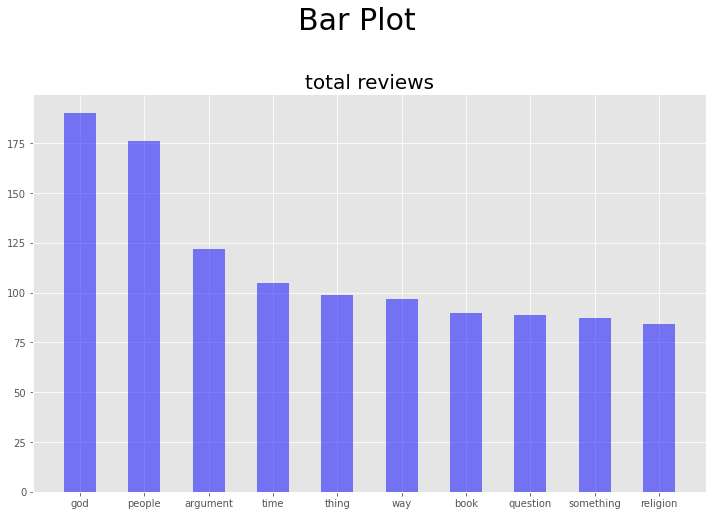

In [20]:
top_10 = c.most_common(k) # 추출한 명사 중 상위 10개
keys = [top_10[i][0] for i in range(len(top_10))]
values = [top_10[i][1] for i in range(len(top_10))]

plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=30)
plt.title('total reviews', fontsize=20)
plt.bar(keys, values, width=0.5, color='b', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

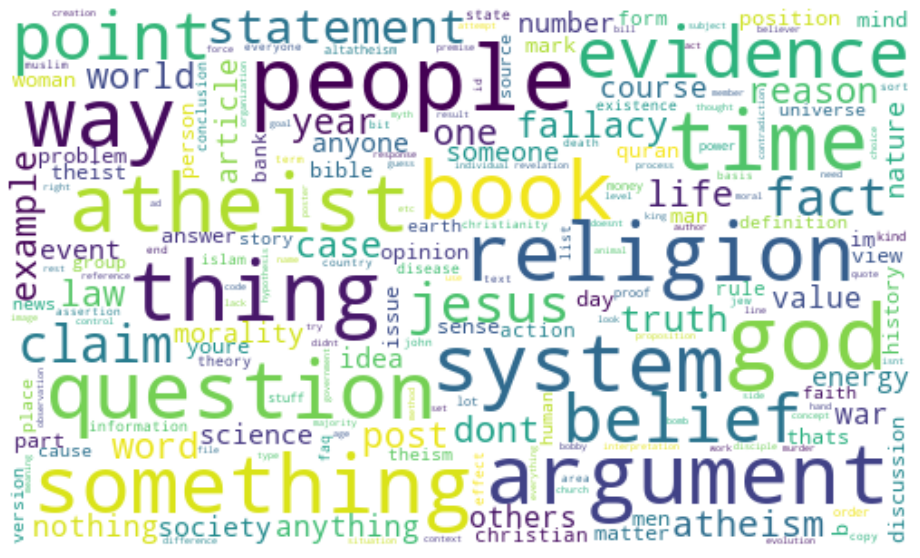

In [21]:
noun_text = ''
for word in final_NN_words:
    noun_text = noun_text +' '+word

wordcloud = WordCloud(max_font_size=50, #가장 큰 폰트 크기 제한
                      width=500, #너비
                      height=300, #높이
                      background_color='white', #배경 색상
                      relative_scaling=.2 #상대적인 크기
                      ).generate(noun_text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
import pandas as pd

#csv 형식의 training 데이터를 로드합니다.
train = pd.read_csv('./train.csv')

#데이터 살펴보기 위해 데이터 최상단의 5줄을 표시합니다.
train.head() 

,id,text,target
0,0,"\nThey were, and even if Washington might cons...",10
1,1,"We run ""SpaceNews & Views"" on our STAREACH BBS...",14
2,2,\n\n\nNot to worry. The Masons have been demo...,19
3,3,"Only Brendan McKay, or maybe ARF, would come t...",17
4,4,Help: I am running some sample problems from O...,5


In [23]:
train.shape

(9233, 3)

In [24]:
train.isna()

,id,text,target
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9228,False,False,False
9229,False,False,False
9230,False,False,False
9231,False,False,False


In [25]:
X = train.text #training 데이터에서 문서 추출
y = train.target #training 데이터에서 라벨 추출

X.head() #데이터 살펴보기

0    \nThey were, and even if Washington might cons...
1    We run "SpaceNews & Views" on our STAREACH BBS...
2    \n\n\nNot to worry.  The Masons have been demo...
3    Only Brendan McKay, or maybe ARF, would come t...
4    Help: I am running some sample problems from O...
Name: text, dtype: object

In [26]:
y.head() #데이터 살펴보기

0    10
1    14
2    19
3    17
4     5
Name: target, dtype: int64

In [27]:
from sklearn.feature_extraction.text import CountVectorizer #sklearn 패키지의 CountVectorizer import

sample_vectorizer = CountVectorizer() #객체 생성

sample_text1 = ["hello, my name is dacon and I am a data scientist!"]

sample_vectorizer.fit(sample_text1) #CountVectorizer 학습

print(sample_vectorizer.vocabulary_) #Vocabulary

{'hello': 4, 'my': 6, 'name': 7, 'is': 5, 'dacon': 2, 'and': 1, 'am': 0, 'data': 3, 'scientist': 8}


In [28]:
sample_text2 = ["you are learning dacon data science"]

sample_vector = sample_vectorizer.transform(sample_text2)
print(sample_vector.toarray())

[[0 0 1 1 0 0 0 0 0]]


In [29]:
sample_text3 = ["you are learning dacon data science with news data"]

sample_vector2 = sample_vectorizer.transform(sample_text3)
print(sample_vector2.toarray())

[[0 0 1 2 0 0 0 0 0]]


In [30]:
vectorizer = CountVectorizer() #countvectorizer 생성
vectorizer.fit(X) #countvectorizer 학습
X = vectorizer.transform(X) #transform

vectorizer.inverse_transform(X[0]) #역변환하여 첫번째 문장의 단어들 확인

[array(['and', 'been', 'bust', 'complete', 'consider', 'druce', 'even',
        'goals', 'has', 'here', 'if', 'in', 'might', 'minute', 'only',
        'patty', 'rework', 'that', 'they', 'trade', 'utter', 'washington',
        'were'], dtype='<U81')]

In [31]:
from sklearn.linear_model import LogisticRegression #모델 불러오기
model = LogisticRegression(max_iter=500) #객체에 모델 할당
model.fit(X, y) #모델 학습

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [32]:
from sklearn.metrics import accuracy_score

#run model
y_pred = model.predict(X[0])
print('예측 라벨 : ', y_pred)
print('실제 라벨 : ', train.target[0])

예측 라벨 :  [10]
실제 라벨 :  10


In [33]:
test = pd.read_csv("./test.csv") #파일 읽기
test.head() #파일 확인

,id,text
0,0,\nThe VL-IDE Adapter can be much faster then t...
1,1,\n\nYeah. In a fire that reportedly burned ho...
2,2,":Judge: ""I grant you immunity from whatever ma..."
3,3,"I, too, put a corbin seat on my Hawk. I got t..."
4,4,\n\nDo I ever!!!!!! After 2 years of having h...


In [34]:
test_X = test.text #문서 데이터 생성

test_X_vect = vectorizer.transform(test_X) #문서 데이터 transform 
#test 데이터를 대상으로 fit_transform 메소드를 실행하는 것은 test 데이터를 활용해 vectorizer 를 학습 시키는 것으롤 data leakage 에 해당합니다.

pred = model.predict(test_X_vect) #test 데이터 예측
print(pred)

[ 3 16 11 ...  4  0  7]


In [35]:
submission = pd.read_csv("./sample_submission.csv") #제출용 파일 불러오기
submission.head() #제출 파일이 잘 생성되었는지 확인

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [36]:
submission["target"] = pred #예측 값 넣어주기
submission.head() # 데이터가 잘 들어갔는지 확인합니다.

,id,target
0,0,3
1,1,16
2,2,11
3,3,8
4,4,13


In [37]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
submission.to_csv("./submission_base.csv",index=False)

In [39]:
#csv 형식의 training 데이터를 로드합니다.
import pandas as pd 

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

#데이터 살펴보기 위해 데이터 최상단의 5줄을 표시합니다.
train.head() 

,id,text,target
0,0,"\nThey were, and even if Washington might cons...",10
1,1,"We run ""SpaceNews & Views"" on our STAREACH BBS...",14
2,2,\n\n\nNot to worry. The Masons have been demo...,19
3,3,"Only Brendan McKay, or maybe ARF, would come t...",17
4,4,Help: I am running some sample problems from O...,5


In [40]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


In [41]:
X = train.text #training 데이터에서 문서 추출
y = train.target #training 데이터에서 라벨 추출

In [42]:
X.head() #데이터 살펴보기

0    \nThey were, and even if Washington might cons...
1    We run "SpaceNews & Views" on our STAREACH BBS...
2    \n\n\nNot to worry.  The Masons have been demo...
3    Only Brendan McKay, or maybe ARF, would come t...
4    Help: I am running some sample problems from O...
Name: text, dtype: object

In [43]:
y.head() #데이터 살펴보기

0    10
1    14
2    19
3    17
4     5
Name: target, dtype: int64

In [44]:
train.text

0       \nThey were, and even if Washington might cons...
1       We run "SpaceNews & Views" on our STAREACH BBS...
2       \n\n\nNot to worry.  The Masons have been demo...
3       Only Brendan McKay, or maybe ARF, would come t...
4       Help: I am running some sample problems from O...
                              ...                        
9228    \n\nPrecisely, why not Cuba??  Why not???  The...
9229    Your Custom Resume On Disk!\n \n              ...
9230    Throughout the years of the Israel/Arab-Palest...
9231    Does anyone know if there are any devices avai...
9232    \n\n      Give ME a break, chum.  Are you tell...
Name: text, Length: 9233, dtype: object

In [45]:
import re 

def clean_text(texts): 
    corpus = [] 
    for i in range(0, len(texts)): 

        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','', review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        corpus.append(review) 
        
    return corpus


In [46]:
temp = clean_text(train['text']) #메소드 적용
train['text'] = temp
print(train)

temp = clean_text(test['text']) #test셋에서도 똑같은 전처리 과정을 해줍니다.
test['text'] = temp

        id                                               text  target
0        0  they were and even if washington might conside...      10
1        1  we run spacenews views on our stareach bbs a l...      14
2        2  not to worry the masons have been demonized an...      19
3        3  only brendan mckay or maybe arf would come to ...      17
4        4  help i am running some sample problems from or...       5
...    ...                                                ...     ...
9228  9228  precisely why not cuba why not the hatians are...      17
9229  9229  your custom resume on disk macintosh or ibm co...       6
9230  9230  throughout the years of the israelarabpalestin...      17
9231  9231  does anyone know if there are any devices avai...       4
9232  9232  give me a break chum are you telling me that c...      18

[9233 rows x 3 columns]


In [47]:
text = "Hello, nice to meet you. What's your name? Have a nice day! See you soon." # 예시 문장을 정의합니다.

In [48]:
import nltk
from nltk.corpus import stopwords
from os import path
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

True

In [49]:
from nltk.tokenize import sent_tokenize

print('문장 토큰화 결과 ==>',sent_tokenize(text))

문장 토큰화 결과 ==> ['Hello, nice to meet you.', "What's your name?", 'Have a nice day!', 'See you soon.']


In [50]:
from nltk.tokenize import word_tokenize

print('단어 토큰화 결과 ==>', word_tokenize(text))

단어 토큰화 결과 ==> ['Hello', ',', 'nice', 'to', 'meet', 'you', '.', 'What', "'s", 'your', 'name', '?', 'Have', 'a', 'nice', 'day', '!', 'See', 'you', 'soon', '.']


In [51]:
tokenized = [] # 데이터프레임의 한 컬럼으로 추가할 리스트
for sentence in train['text']: # 전처리된 리뷰들을 하나씩 꺼내옵니다
    tokens = nltk.word_tokenize(sentence)
    tokenize = " ".join(tokens) # tokens라는 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
    tokenized.append(tokenize) # 형태소 단위로 띄어쓰기된 문자열을 최종 리스트에 추가해줍니다
train["tokenized_stem"] = pd.DataFrame(tokenized) # 리스트를 데이터프레임으로 변환해 tokenized_stem라는 컬럼명으로 추가해줍니다.

train.head() # 데이터 확인

,id,text,target,tokenized_stem
0,0,they were and even if washington might conside...,10,they were and even if washington might conside...
1,1,we run spacenews views on our stareach bbs a l...,14,we run spacenews views on our stareach bbs a l...
2,2,not to worry the masons have been demonized an...,19,not to worry the masons have been demonized an...
3,3,only brendan mckay or maybe arf would come to ...,17,only brendan mckay or maybe arf would come to ...
4,4,help i am running some sample problems from or...,5,help i am running some sample problems from or...


In [52]:
# pos_tag()의 입력값으로는 단어의 리스트가 들어가야 한다.
print(nltk.pos_tag(nltk.word_tokenize(train['text'][4])))

[('help', 'NN'), ('i', 'VB'), ('am', 'VBP'), ('running', 'VBG'), ('some', 'DT'), ('sample', 'NN'), ('problems', 'NNS'), ('from', 'IN'), ('oreilly', 'RB'), ('volume', 'NN'), ('xt', 'JJ'), ('intrisics', 'NNS'), ('programming', 'VBG'), ('manual', 'JJ'), ('chapter', 'NN'), ('popupdialog', 'NN'), ('boxes', 'NNS'), ('and', 'CC'), ('so', 'RB'), ('onin', 'JJ'), ('example', 'NN'), ('page', 'NN'), ('creating', 'VBG'), ('a', 'DT'), ('popup', 'NN'), ('dialog', 'NN'), ('boxthe', 'JJ'), ('application', 'NN'), ('creates', 'VBZ'), ('window', 'VBP'), ('with', 'IN'), ('a', 'DT'), ('button', 'NN'), ('quit', 'NN'), ('and', 'CC'), ('press', 'NN'), ('methe', 'VBP'), ('button', 'NN'), ('press', 'NN'), ('me', 'PRP'), ('pops', 'VBZ'), ('up', 'RP'), ('a', 'DT'), ('dialog', 'NN'), ('box', 'IN'), ('the', 'DT'), ('strange', 'JJ'), ('feature', 'NN'), ('ofthis', 'JJ'), ('program', 'NN'), ('is', 'VBZ'), ('that', 'IN'), ('it', 'PRP'), ('always', 'RB'), ('pops', 'VBZ'), ('up', 'RP'), ('the', 'DT'), ('dialog', 'NN'), ('

In [53]:
def postagging(dataframe):
    main_pos = [] # 데이터프레임의 새 컬럼이 될 리스트
    for sentence in dataframe['text']: # 리뷰들을 하나씩 가져옵니다
        pos = nltk.pos_tag(nltk.word_tokenize(sentence)) # 형태소 분석을 진행하고 해당 리스트를 pos라는 변수로 받습니다
        main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ('JJ', 'JJR', 'JJS', #형용사
                                                                         'NN', 'NNS', 'NNP', 'NNPS', #명사
                                                                         'RB', 'RBR', 'RBBS', #부사
                                                                         'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ' #동사
                                                                         )] # 가져오고자 하는 품사에 해당하면 해당 형태소를 main_words 리스트에 추가합니다.
        main_words_str = " ".join(main_words) # main_words 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
        main_pos.append(main_words_str) # 선택한 형태소들로 이루어진 문자열을 최종 리스트에 추가해줍니다
        dataframe["main_pos"] = pd.DataFrame(main_pos) # 리스트를 데이터프레임으로 변환해 main_pos라는 컬럼명으로 추가해줍니다.

postagging(train)
postagging(test) ## test셋도 똑같이 품사태깅을 적용해줍니다.
train.head() # 데이터 확인

,id,text,target,tokenized_stem,main_pos
0,0,they were and even if washington might conside...,10,they were and even if washington might conside...,were even washington consider patty bust id tr...
1,1,we run spacenews views on our stareach bbs a l...,14,we run spacenews views on our stareach bbs a l...,run spacenews views stareach bbs localoperatio...
2,2,not to worry the masons have been demonized an...,19,not to worry the masons have been demonized an...,not worry masons have been demonized harrassed...
3,3,only brendan mckay or maybe arf would come to ...,17,only brendan mckay or maybe arf would come to ...,only brendan mckay maybe arf come rescue nazir...
4,4,help i am running some sample problems from or...,5,help i am running some sample problems from or...,help i am running sample problems oreilly volu...


In [54]:
from sklearn.model_selection import train_test_split

data = train.copy()
train, val = train_test_split(data)
train.reset_index(inplace=True) # 전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화해주었습니다.
val.reset_index(inplace=True)

In [55]:
print( 'train 데이터 셋 모양 :', train.shape)
print( 'val 데이터 셋 모양 :', val.shape)

train 데이터 셋 모양 : (6924, 6)
val 데이터 셋 모양 : (2309, 6)


In [56]:
X_train = train.main_pos #training 데이터에서 문서 추출
y_train = train.target #training 데이터에서 라벨 추출

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() #countvectorizer 생성
vectorizer.fit(X_train) # countvectorizer 학습
X_train_vec = vectorizer.transform(X_train) # transform

In [58]:
from sklearn.linear_model import LogisticRegression #모델 불러오기
model = LogisticRegression(max_iter=500) #객체에 모델 할당
model.fit(X_train_vec, y_train) #모델 학습

LogisticRegression(max_iter=500)

In [59]:
X_val = val.main_pos #validation 데이터에서 전처리된 문서 추출
y_val = val.target #validation 데이터에서 라벨 추출

X_val_vec = vectorizer.transform(X_val) # train셋으로 fit한 벡터라이저 이용해 transform

In [60]:
y_pred = model.predict(X_val_vec)
print(y_pred)

[ 0 15 13 ...  6  9 13]


In [61]:
from sklearn import metrics
print('Logistic Regression 의 예측 정확도는', round(metrics.accuracy_score(y_val, y_pred),3)) # 정확도 확인

Logistic Regression 의 예측 정확도는 0.613


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = train.main_pos #training 데이터에서 문서 추출
y_train = train.target #training 데이터에서 라벨 추출

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환. 
tfidf_vect = TfidfVectorizer(ngram_range=(1,2), max_df=300)
tfidf_vect.fit(X_train)

X_val = val.main_pos #validation 데이터에서 전처리된 문서 추출
y_val = val.target #validation 데이터에서 라벨 추출

X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_val_tfidf_vect = tfidf_vect.transform(X_val) # train셋으로 fit한 벡터라이저 이용해 transform
print('학습 & 테스트 데이터 Text의 TfidfVectorizer Shape:',X_train_tfidf_vect.shape, X_val_tfidf_vect.shape)

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression(solver='liblinear', C = 10) 
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_val_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(metrics.accuracy_score(y_val ,pred)))

학습 & 테스트 데이터 Text의 TfidfVectorizer Shape: (6924, 639509) (2309, 639509)
TF-IDF Logistic Regression 의 예측 정확도는 0.717


In [63]:
X_train = data.main_pos #전체 training 데이터에서 문서 추출
y_train = data.target #전체 training 데이터에서 라벨 추출

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환. 
tfidf_vect = TfidfVectorizer(ngram_range=(1,2), max_df=300)
tfidf_vect.fit(X_train)

X_train_tfidf_vect = tfidf_vect.transform(X_train)

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression(solver='liblinear', C = 10) 
lr_clf.fit(X_train_tfidf_vect , y_train)

LogisticRegression(C=10, solver='liblinear')

In [64]:
X_test = test.main_pos
X_test_vec = tfidf_vect.transform(X_test)
pred_test = lr_clf.predict(X_test_vec)
print(pred_test)

[ 3 16 11 ...  4  1 12]


In [65]:
# 제출용 sample 파일을 불러옵니다.
submission = pd.read_csv('./sample_submission.csv')
submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [66]:
# 위에서 구한 예측값을 그대로 넣어줍니다.
submission['target'] = pred_test

# 데이터가 잘 들어갔는지 확인합니다.
submission

,id,target
0,0,3
1,1,16
2,2,11
3,3,8
4,4,13
...,...,...
9228,9228,16
9229,9229,1
9230,9230,4
9231,9231,1


In [67]:
submission.to_csv("submission_baseline2.csv", index=False)